In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace

In [3]:
conf = !python  parameters.py

In [4]:
configs = eval(conf[0])



In [5]:
## Experiment config
configs.name="E1000v9"
configs.n_devices=999
configs.n_jobs=9



In [6]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_ppo_alloc_'  + str(configs.name) + "_w5050_v2.pkl", 'infer')


In [7]:
machines,speed, latency, cost = [],[],[],[]
for x in range(len(df)):
    machines.append(df[x][1])
    speed.append(df[x][2])
    latency.append(df[x][3])
    cost.append(df[x][4])
machines = np.array(machines)
speed = np.array(speed)
latency = np.array(latency)
cost = np.array(cost)
machines.shape


(280, 81)

In [8]:
print(latency[0])


[ 1. 40. 50. 20. 40. 20. 10. 50. 10. 50. 20. 20.  1. 50. 30. 20. 10. 30.
 40. 10. 20. 20. 30. 20.  1. 50. 40. 50. 10. 20. 10. 50.  1. 50. 10.  1.
  1. 50. 30. 40. 20. 30.  1. 20. 10. 20. 50. 10. 50. 10.  1. 20.  1. 50.
 30. 10. 50. 50. 10. 50. 40. 40. 30.  1. 20. 40. 40.  1. 40.  1.  1. 20.
 20.  1.  1. 20. 20. 20. 40. 20. 40.]


In [9]:
cost[:10]

array([[30., 20., 40., 10., 20., 20.,  1.,  1., 40., 20.,  1., 10., 10.,
        20., 10.,  1.,  1., 10., 10., 20., 20., 40., 40., 30., 40.,  1.,
         1., 20., 20., 10.,  1., 20., 10.,  1., 40., 20., 40., 30., 20.,
        40., 10., 20., 40., 10., 30., 10., 40., 20., 20., 20., 20., 30.,
        40., 30., 10., 40., 20., 40., 30., 20., 20., 40., 10.,  1., 40.,
         1.,  1., 30., 30., 20., 40., 10.,  1., 40.,  1., 10.,  1., 30.,
         1., 30., 40.],
       [40., 40., 30., 10., 40., 30., 40., 30., 40., 20., 40.,  1., 20.,
        40.,  1., 10., 30., 30.,  1., 20., 10., 40., 30., 20., 30., 30.,
        40.,  1., 30., 40., 30., 30., 30., 10., 30., 20., 20., 30., 10.,
        20., 30., 30., 30., 10., 30., 10., 40., 30., 40., 10., 20., 30.,
        30.,  1., 40., 30., 40., 10., 20., 40., 30., 30., 30.,  1., 40.,
        30., 20., 40., 40., 10.,  1.,  1.,  1., 30., 20.,  1., 40., 40.,
         1., 10., 30.],
       [30., 30., 10.,  1., 40., 20., 10., 10.,  1., 30., 40., 20., 20.,
   

In [10]:
cost_ticks=configs.cost_options
my_dict = {cost:e for e,cost in enumerate(cost_ticks)}
cst = np.vectorize(my_dict.get)(cost)
cst

array([[3, 2, 4, ..., 0, 3, 4],
       [4, 4, 3, ..., 0, 1, 3],
       [3, 3, 1, ..., 4, 2, 0],
       ...,
       [0, 1, 3, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0]])

7
[1, 10, 20, 30, 40]
[  0.  50. 100.]
[  0.  50. 100.]
[  0.  50. 100.]
[  0.  50. 100.]
[  0.  50. 100.]
[  0.  50. 100.]
[  0.  50. 100.]


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_72270/4206906901.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


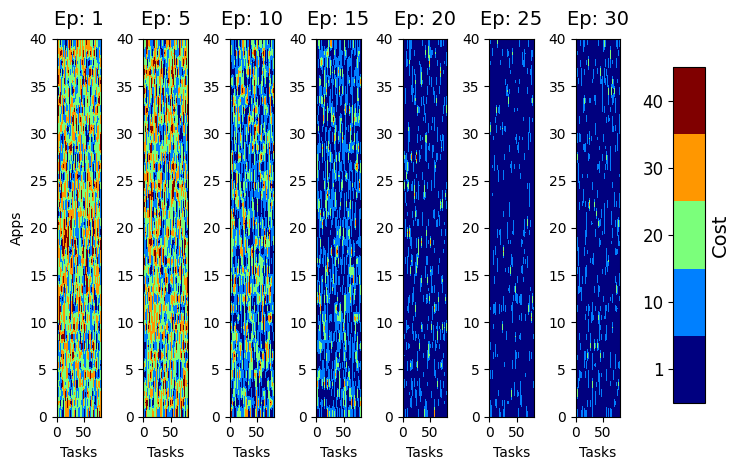

In [11]:

size = 40
nplots = len(cost)//size
print(nplots)
cost_ticks=configs.cost_options
print(cost_ticks)
n_costs = len(cost_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',n_costs)
bounds =  np.arange(0,n_costs,1)

fig, axi = plt.subplots(1, nplots)
episode = [1, 5, 10, 15, 20, 25, 30]
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(cst[e*size:(n*size)+size], extent=[0,configs.n_jobs*configs.n_jobs,0,40], aspect="auto", cmap=c)
    # axi[e].set_xticklabels([])
    print(axi[e].get_xticks())
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Ep: %i'%(episode[e]),fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.06, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_costs)+(1/(n_costs*2)))
cb.set_ticklabels(cost_ticks, fontsize=12)
cb.ax.set_ylabel('Cost',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
# plt.savefig("images/speed_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_72270/3726414346.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


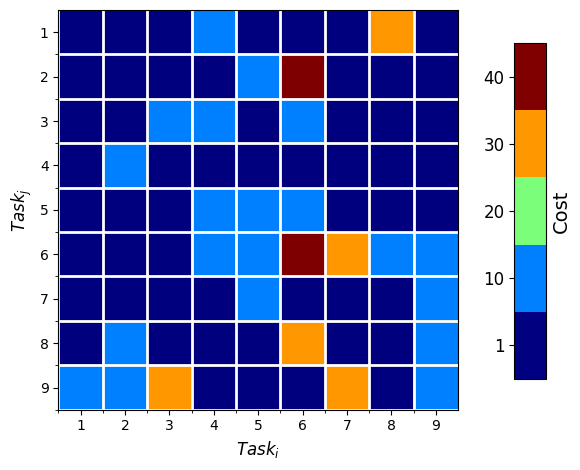

In [13]:
fig, axi = plt.subplots(1, 1)
im3 = axi.imshow(cst[(e)*size:(n*size)+size][0].reshape(9,9),  extent=[0,9,0,9], aspect=1, cmap=c)
axi.set_xlabel('$Task_i$', fontsize=12)
axi.set_ylabel('$Task_j$', fontsize=12)
# axi.set_title('App 0 from Episode %i'%episode[e],fontsize=14,pad=10)

# Minor ticks
axi.set_xticks(np.arange(0,9, 1), minor=True)
axi.set_yticks(np.arange(0,9, 1), minor=True)

# Gridlines based on minor ticks
axi.grid(which='minor', color='w', linestyle='-', linewidth=2)

axi.set_xticks((axi.get_xticks()+0.5)[:-1])
axi.set_xticklabels(range(1,10))
axi.set_yticks((axi.get_yticks()+0.5)[:-1])
axi.set_yticklabels(range(1,10)[::-1])

cbar_ax = fig.add_axes([0.9, 0.2, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_costs)+(1/(n_costs*2)))
cb.set_ticklabels(cost_ticks, fontsize=12)
cb.ax.set_ylabel('Cost',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')

fig.tight_layout()
plt.savefig("images/app0fromEp30Cost.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

### Latency

In [14]:

latency_ticks=[1,10,20,30,40,50]
my_dict = {1:1, 10:2, 20:3, 30:4, 40:5, 50:6}
lat = np.vectorize(my_dict.get)(latency)
lat
   

array([[1, 5, 6, ..., 5, 3, 5],
       [3, 6, 4, ..., 6, 4, 6],
       [6, 2, 2, ..., 6, 5, 2],
       ...,
       [2, 1, 2, ..., 1, 1, 2],
       [2, 1, 2, ..., 2, 2, 1],
       [1, 2, 1, ..., 1, 2, 1]])

In [15]:
lat.shape

(280, 81)

7
[1 6 2 1 2 1 1 1 1 2 2 2 1 1 1 2 2 1 1 2 1 1 2 1 1 3 3 1 1 1 2 2 3 1 1 1 2
 2 2 1 1 1 2 1 2 2 2 1 1 1 1 4 1 1 2 2 2 2 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1
 1 1 2 1 1 1 1]
81


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_72270/3358958399.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


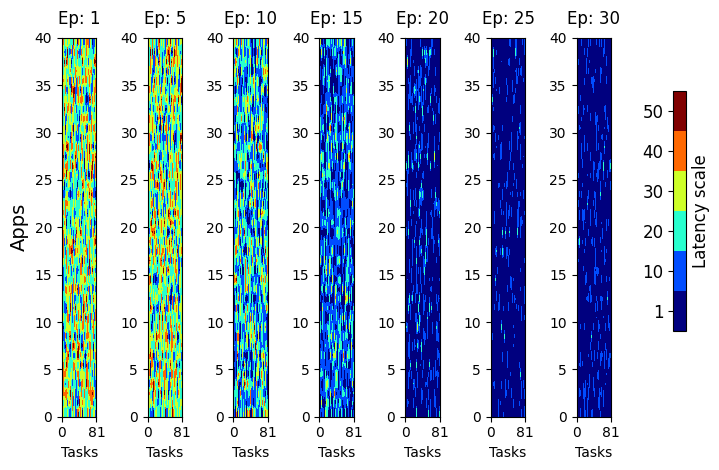

In [17]:

size = 40
nplots = len(lat)//size
print(nplots)
n_latencies = len(latency_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',6)
bounds =  np.arange(0,n_latencies,1)

height_ratios=[1, 1, 1, 1, 1, 1, 1, 2]
fig, axi = plt.subplots(1, nplots)
episode = [1, 5, 10, 15, 20, 25, 30]
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(lat[e*size:(n*size)+size], extent=[0,configs.n_jobs*configs.n_jobs,0,40], aspect="auto" ,cmap=c)
    # axi[e].set_xticklabels([])
    axi[e].set_xticks([0,81])
    
    if e == 0: axi[e].set_ylabel("Apps", fontsize=14)
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Ep: %i'%episode[e],fontsize=12,pad=10)

print(lat[(e)*size:(n*size)+size][0])
print(len(lat[(e)*size:(n*size)+size][0]))


cbar_ax = fig.add_axes([1.06, 0.3, 0.02, 0.5])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(latency_ticks, fontsize=12)
cb.ax.set_ylabel('Latency scale',  fontsize=12,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig("images/latency_40_1000_81.pdf",dpi=300,bbox_inches = 'tight')
plt.show()


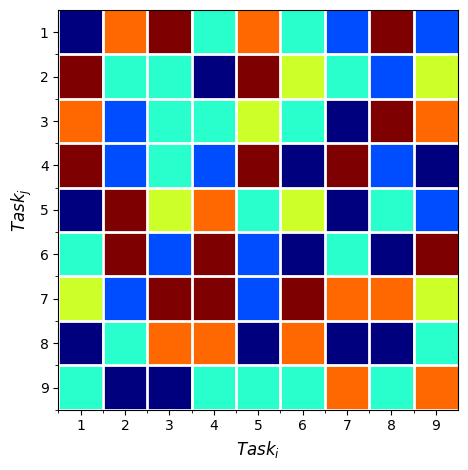

In [189]:

fig, axi = plt.subplots(1, 1)
im3 = axi.imshow(lat[(0)*size:(n*size)+size][0].reshape(9,9),  extent=[0,9,0,9], aspect=1, cmap=c)
axi.set_xlabel('$Task_i$', fontsize=12)
axi.set_ylabel('$Task_j$', fontsize=12)
# axi.set_title('App 0 from Episode %i'%episode[e],fontsize=14,pad=10)

# Minor ticks
axi.set_xticks(np.arange(0,9, 1), minor=True)
axi.set_yticks(np.arange(0,9, 1), minor=True)

# Gridlines based on minor ticks
axi.grid(which='minor', color='w', linestyle='-', linewidth=2)

axi.set_xticks((axi.get_xticks()+0.5)[:-1])
axi.set_xticklabels(range(1,10))
axi.set_yticks((axi.get_yticks()+0.5)[:-1])
axi.set_yticklabels(range(1,10)[::-1])

# cbar_ax = fig.add_axes([0.9, 0.2, 0.05, 0.7])
# cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
# cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
# cb.set_ticklabels(latency_ticks, fontsize=12)
# cb.ax.set_ylabel('Latency',  fontsize=14,)
# cb.ax.yaxis.set_ticks_position('left')

fig.tight_layout()
plt.savefig("images/app0fromEp30Lat_e0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()



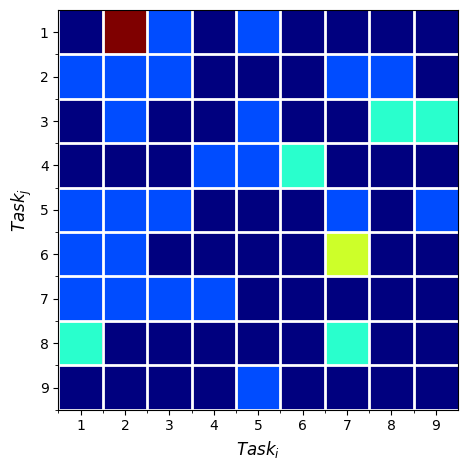

In [191]:
fig, axi = plt.subplots(1, 1)
im3 = axi.imshow(lat[(e)*size:(n*size)+size][0].reshape(9,9),  extent=[0,9,0,9], aspect=1, cmap=c)
axi.set_xlabel('$Task_i$', fontsize=12)
axi.set_ylabel('$Task_j$', fontsize=12)
# axi.set_title('App 0 from Episode %i'%episode[e],fontsize=14,pad=10)

# Minor ticks
axi.set_xticks(np.arange(0,9, 1), minor=True)
axi.set_yticks(np.arange(0,9, 1), minor=True)

# Gridlines based on minor ticks
axi.grid(which='minor', color='w', linestyle='-', linewidth=2)

axi.set_xticks((axi.get_xticks()+0.5)[:-1])
axi.set_xticklabels(range(1,10))
axi.set_yticks((axi.get_yticks()+0.5)[:-1])
axi.set_yticklabels(range(1,10)[::-1])

# cbar_ax = fig.add_axes([0.9, 0.2, 0.05, 0.7])
# cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
# cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
# cb.set_ticklabels(latency_ticks, fontsize=12)
# cb.ax.set_ylabel('Latency',  fontsize=14,)
# cb.ax.yaxis.set_ticks_position('left')

fig.tight_layout()
plt.savefig("images/app0fromEp30Lat.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [81]:
lat[e*size:(n*size)+size][0].reshape
lat[e*size:(n*size)+size][0].reshape

array([1, 6, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 3, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])